In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [251]:
df = pd.read_csv("bank-full.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [253]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [227]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [228]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
Target
['no' 'yes']


In [229]:
df.apply(lambda x: sum(x.isnull()))

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [230]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

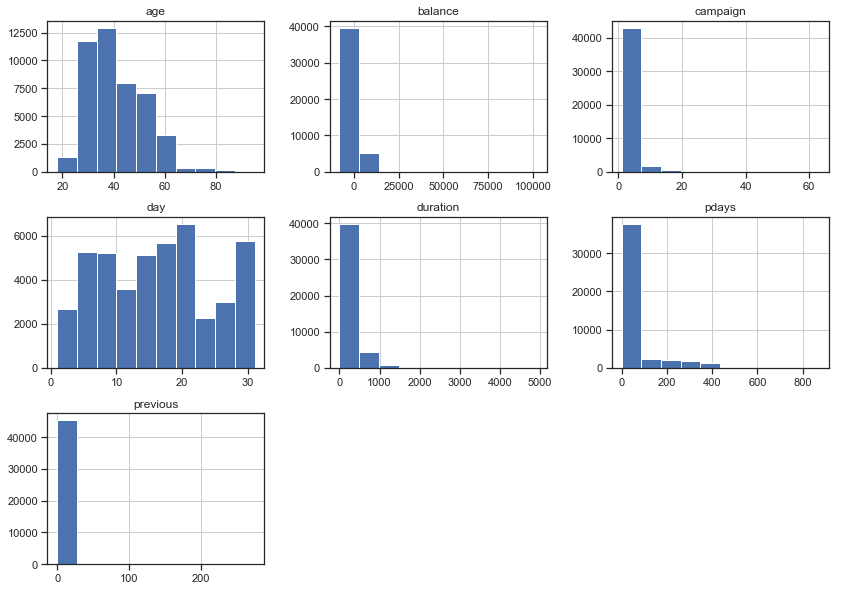

In [231]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt

df.hist(figsize=(14,10))
plt.show()

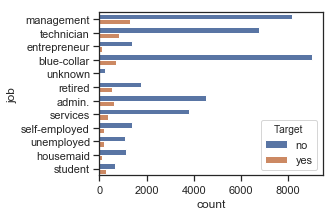

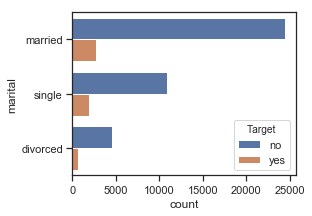

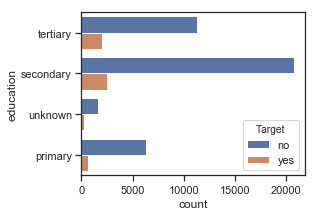

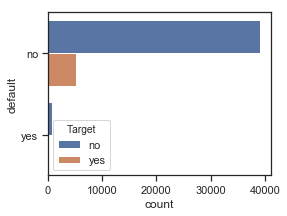

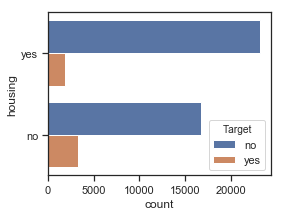

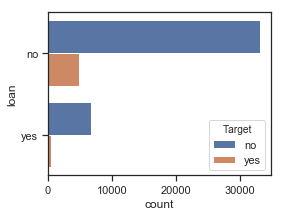

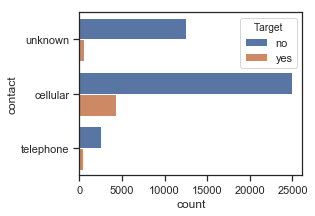

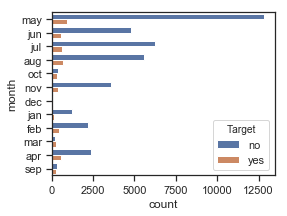

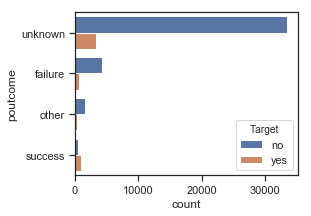

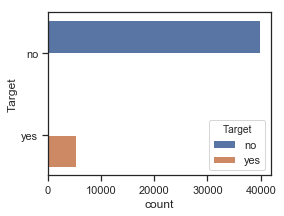

In [232]:
object_bol = df.dtypes =='object'

for x,t in enumerate(df.dtypes[object_bol].index):
    plt.figure(figsize=(4,3))
    
    sns.countplot(y=t, hue="Target",data=df)  

[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

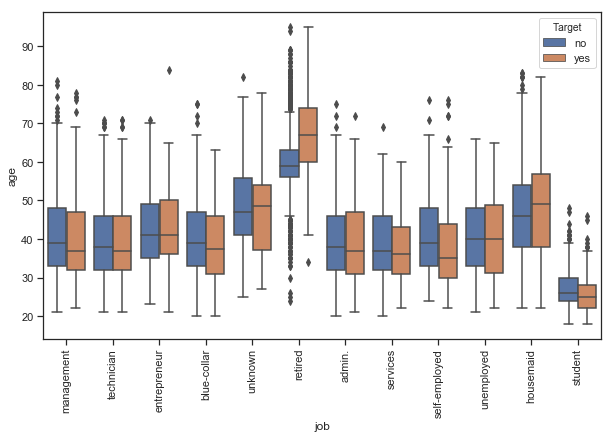

In [233]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='age', x='job', hue='Target',data=df)
ax.set_xticklabels(df["job"].unique(), rotation=90)

Text(0.5, 1.0, 'Amount of Balance by Term Suscriptions')

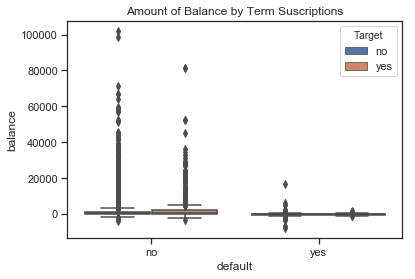

In [234]:
g = sns.boxplot(x="default", y="balance", hue="Target", data=df)
g.set_title("Amount of Balance by Term Suscriptions")

- Observed that when default is no and Target is no, there are lots of outliers 

Text(0.5, 1.0, 'Type of Work by Term Suscriptions')

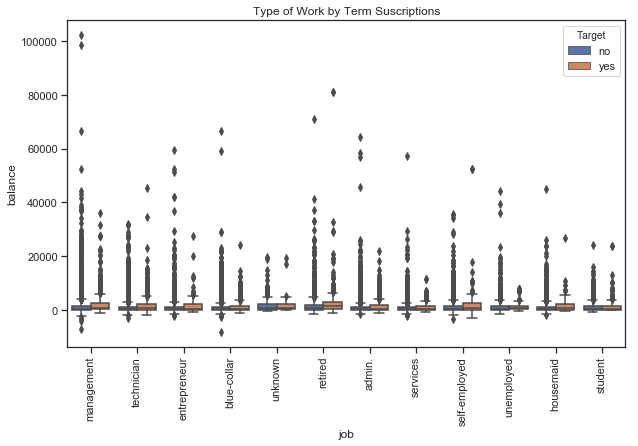

In [235]:
plt.figure(figsize=(10,6))
g1 = sns.boxplot(x="job", y="balance", hue="Target", data=df)

g1.set_xticklabels(df["job"].unique(), rotation=90)
g1.set_title("Type of Work by Term Suscriptions")

Text(0.5, 1.0, 'Distribution of Balance by Education')

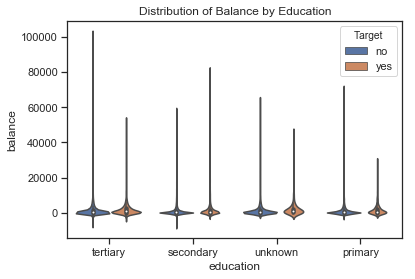

In [236]:
g2 = sns.violinplot(data=df, x="education", y="balance", hue="Target")
g2.set_title("Distribution of Balance by Education")

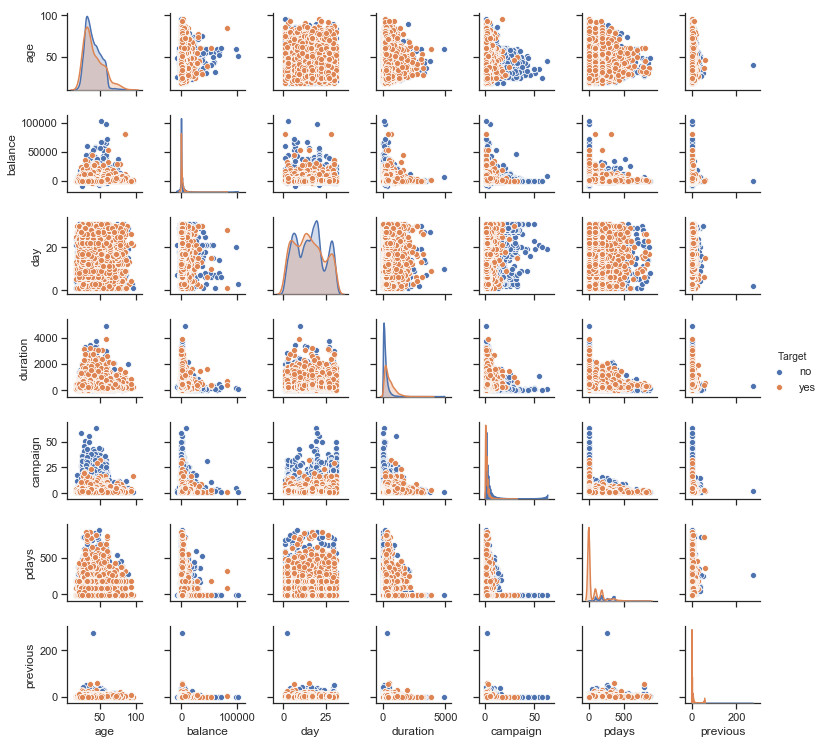

In [237]:
sns.pairplot(df, hue='Target', height=1.5)

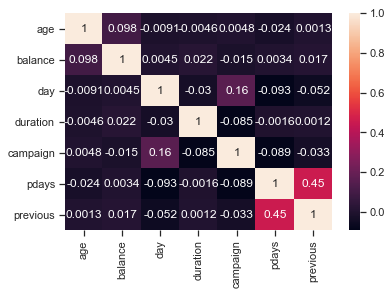

In [238]:
sns.heatmap(df.corr(method='pearson'), annot=True)

- Observed that pdays amd previous is highly correlated

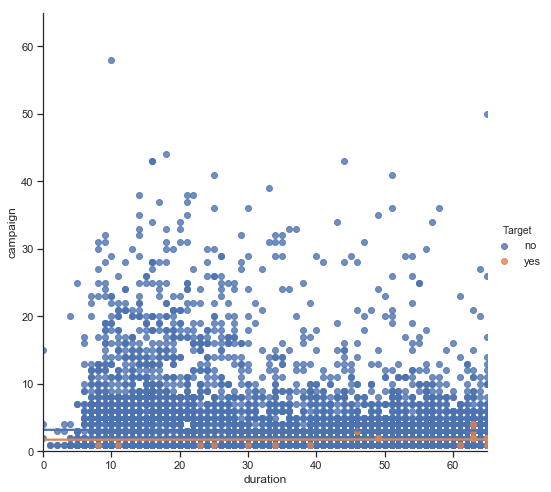

In [239]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = df,hue = 'Target',
                     scatter_kws={'alpha':0.8}, height =7)

plt.axis([0,65,0,65])
plt.show()

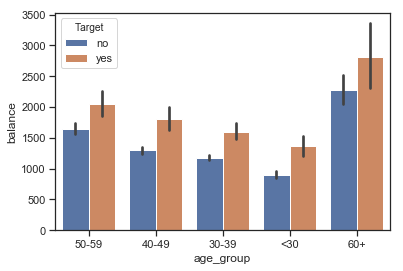

In [254]:
df.loc[df["age"] < 30,  'age_group'] = '<30'
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age_group'] =  '30-39'
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age_group'] = '40-49'
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age_group'] = '50-59'
df.loc[df["age"] >= 60, 'age_group'] = '60+'

#df['age'] = [30,40,50,20,60]
#df = age.sort_values('age',ascending = True)

sns.barplot(x="age_group", y="balance",hue="Target", data=df)
#plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

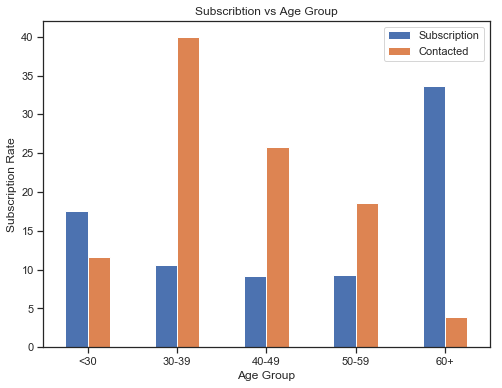

In [256]:
import matplotlib.pyplot as plt

count_age_response_pct = pd.crosstab(df['Target'],df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.T
age = pd.DataFrame(df['age_group'].value_counts())
age['Contacted'] = age['age_group']*100/age['age_group'].sum()
age['Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['Subscription','Contacted']].plot(kind = 'bar',
                                              figsize=(8,6))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plot_age.set_title("Subscribtion vs Age Group")
plt.show()

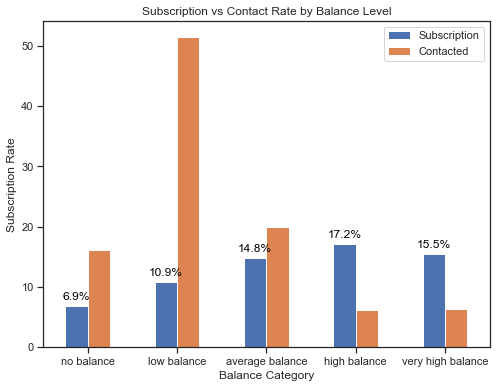

In [219]:
df.loc[df["balance"] <= 0,  'balance_group'] = 'no balance'
df.loc[(df["balance"] > 0) & (df["balance"] <= 1000), 'balance_group'] = 'low balance'
df.loc[(df["balance"] > 1000) & (df["balance"] <= 3000), 'balance_group'] = 'average balance'
df.loc[(df["balance"] > 3000) & (df["balance"] <= 5000), 'balance_group'] = 'high balance'
df.loc[(df["balance"] > 5000), 'balance_group'] = 'very high balance'

count_balance_response_pct = pd.crosstab(df['Target'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.T

bal = pd.DataFrame(df['balance_group'].value_counts())
bal['Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,4,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['Subscription','Contacted']].plot(kind = 'bar',figsize = (8,6))

plot_balance.set_title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

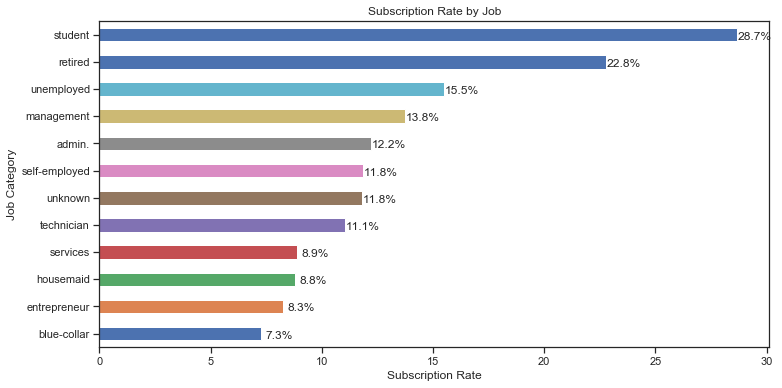

In [214]:
count_job_response_pct = pd.crosstab(df['Target'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plot_job.set_title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [220]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

df.head()

,age,balance,day,duration,campaign,pdays,previous,age_group,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Target_yes,balance_group_high balance,balance_group_low balance,balance_group_no balance,balance_group_very high balance
0,58,2143,5,261,1,-1,0,50,0,0,...,0,0,0,0,1,0,0,0,0,0
1,44,29,5,151,1,-1,0,40,0,0,...,0,0,0,0,1,0,0,1,0,0
2,33,2,5,76,1,-1,0,30,0,1,...,0,0,0,0,1,0,0,1,0,0
3,47,1506,5,92,1,-1,0,40,1,0,...,0,0,0,0,1,0,0,0,0,0
4,33,1,5,198,1,-1,0,30,0,0,...,0,0,0,0,1,0,0,1,0,0


In [222]:
df.drop(['balance'],axis=1)

,age,day,duration,campaign,pdays,previous,age_group,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Target_yes,balance_group_high balance,balance_group_low balance,balance_group_no balance,balance_group_very high balance
0,58,5,261,1,-1,0,50,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,44,5,151,1,-1,0,40,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,33,5,76,1,-1,0,30,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,47,5,92,1,-1,0,40,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,33,5,198,1,-1,0,30,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,35,5,139,1,-1,0,30,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6,28,5,217,1,-1,0,20,0,0,0,...,0,0,0,0,1,0,0,1,0,0
7,42,5,380,1,-1,0,40,0,1,0,...,0,0,0,0,1,0,0,1,0,0
8,58,5,50,1,-1,0,50,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,43,5,55,1,-1,0,40,0,0,0,...,0,0,0,0,1,0,0,1,0,0
